## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Bike Sharing Capstone Project</p>

<div class="alert alert-block alert-info alert">

# <span style=" color:red">Introduction
    
Welcome to "Bike Demand Visualization Project" which is a feature engineering and data visualization capstone project. The aim of this project is to reveal the current patterns in London bike shares data with visualization tools. Before preparing the data for a machine learning model, I will fist examine and process, then visualize data. Finally, in conclusion part, I will evaluate data and discuss my findings. In a different notebook, I will implement a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">About the data set 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: '%.2f'  %x)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
df=pd.read_csv("store_sharing.csv", sep=",")

In [3]:
df.sample(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
9357,2016-01-30 18:00:00,829,7.00,3.00,53.00,25.00,1.00,0.00,1.00,3.00
6227,2015-09-21 11:00:00,1090,15.50,15.50,77.00,19.50,3.00,0.00,0.00,2.00
14639,2016-09-10 07:00:00,367,19.00,19.00,80.50,14.00,2.00,0.00,1.00,2.00
7011,2015-10-24 10:00:00,1234,14.00,14.00,74.50,15.00,3.00,0.00,1.00,2.00
10913,2016-04-05 13:00:00,1387,14.50,14.50,51.00,19.50,2.00,0.00,0.00,0.00
5367,2015-08-16 06:00:00,150,14.00,14.00,69.50,6.00,1.00,0.00,1.00,1.00
439,2015-01-22 08:00:00,3828,2.00,1.00,81.00,5.00,3.00,0.00,0.00,3.00
11970,2016-05-19 15:00:00,1509,17.50,17.50,57.50,16.00,2.00,0.00,0.00,0.00
14419,2016-08-30 14:00:00,1868,26.00,26.00,34.00,11.00,1.00,0.00,0.00,1.00
12067,2016-05-23 16:00:00,2103,18.50,18.50,41.50,13.00,2.00,0.00,0.00,0.00


In [4]:
df.shape

(17414, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.00,1143.10,1085.11,0.00,257.00,844.00,1671.75,7860.00
t1,17414.00,12.47,5.57,-1.50,8.00,12.50,16.00,34.00
t2,17414.00,11.52,6.62,-6.00,6.00,12.50,16.00,34.00
hum,17414.00,72.32,14.31,20.50,63.00,74.50,83.00,100.00
wind_speed,17414.00,15.91,7.89,0.00,10.00,15.00,20.50,56.50
weather_code,17414.00,2.72,2.34,1.00,1.00,2.00,3.00,26.00
is_holiday,17414.00,0.02,0.15,0.00,0.00,0.00,0.00,1.00
is_weekend,17414.00,0.29,0.45,0.00,0.00,0.00,1.00,1.00
season,17414.00,1.49,1.12,0.00,0.00,1.00,2.00,3.00


<div class="alert alert-info">
<span style=" color:dark green">
    
- We have 17414 observations (rows) and 10 variables (columns) including target variable (cnt). There are 8 float, 1 object and 1 integer columns. We can see the numeric variables and their mean and standart deviation values in the describe table. 
</span>

<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [7]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [8]:
df.duplicated().value_counts(dropna=False)

False    17414
dtype: int64

<div class="alert alert-info">
<span style=" color:dark green">
    
- There is no null values in our data set. We do not have any duplicated observation, either.
</span>

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, holiday, weekend and weathercode)
</span>

In [9]:
# To use it later, let's categorize is_weekend and is_holiday in a different way instead of 0 and 1.
weekend=lambda x: "Weekend" if x==1 else "Weekdays"
holiday=lambda x: "Holiday" if x==1 else "Non Holiday"

In [10]:
# Categories of season variable
df.season.value_counts()

0.00    4394
1.00    4387
3.00    4330
2.00    4303
Name: season, dtype: int64

In [11]:
# Similarly, let's categorize season names 
df['season_name'] = df['season'].replace({0:"Spring", 1:"Summer", 2:"Autumn", 3:"Winter"})

# Another way: use map
# season_name = {0:"Spring", 1:"Summer", 2:"Autumn", 3:"Winter"}
# df["season_name"]=df.season.map(season_name)

In [12]:
# Categories of weather_code variable
df.weather_code.value_counts()

1.00     6150
2.00     4034
3.00     3551
7.00     2141
4.00     1464
26.00      60
10.00      14
Name: weather_code, dtype: int64

In [13]:
# Change the categories of weather_code, too.
df['weather_name'] = df['weather_code'].replace({ 
    1:'Clear',
    2:'Few clouds',
    3:'Broken clouds',
    4:'Cloudy',
    7:'Light Rain shower',
    10:'Thunderstorm',
    26:'Snowfall ',
    94:'Freezing Fog'})

#  using map is another way to do it.

In [14]:
# Since we do not need season and weather_code columns anymore, we can drop them.
df.drop('season', axis=1,inplace=True)
df.drop('weather_code', axis=1,inplace=True)

In [15]:
# let's check our new df
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_name,weather_name
0,2015-01-04 00:00:00,182,3.00,2.00,93.00,6.00,0.00,1.00,Winter,Broken clouds
1,2015-01-04 01:00:00,138,3.00,2.50,93.00,5.00,0.00,1.00,Winter,Clear
2,2015-01-04 02:00:00,134,2.50,2.50,96.50,0.00,0.00,1.00,Winter,Clear
3,2015-01-04 03:00:00,72,2.00,2.00,100.00,0.00,0.00,1.00,Winter,Clear
4,2015-01-04 04:00:00,47,2.00,0.00,93.00,6.50,0.00,1.00,Winter,Clear


In [16]:
# Unique values in our new columns

print(f"Weather conditions: \n{df.weather_name.unique()}")
print(f"Seasons: \n{df.season_name.unique()}")

Weather conditions: 
['Broken clouds' 'Clear' 'Cloudy' 'Light Rain shower' 'Few clouds'
 'Snowfall ' 'Thunderstorm']
Seasons: 
['Winter' 'Spring' 'Summer' 'Autumn']


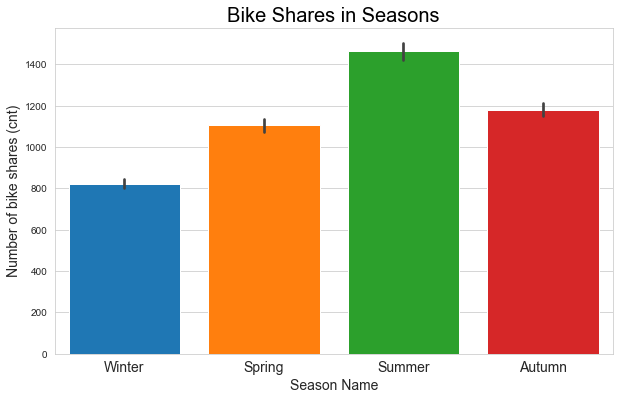

In [17]:
# Plot Seasons
fig, ax = plt.subplots(figsize=(10,6)) 
sns.barplot(x="season_name", y="cnt", saturation=2, data=df)
plt.title("Bike Shares in Seasons", {'fontsize': 20,'color': "black"})
plt.xlabel("Season Name", fontsize = 14)
plt.tick_params('x', labelsize=14) 
plt.ylabel("Number of bike shares (cnt)", fontsize = 14);

<div class="alert alert-info">
<span style=" color:dark green">As seen from the the bar chart above:
    
- People in London share bikes the most in the Summer season followed by Autumn and Spring. On the other hand, the number of bike sharing in Winter is the quite low. We can deduce that there might be a correlation between weather condition and count of bike share.
</span>

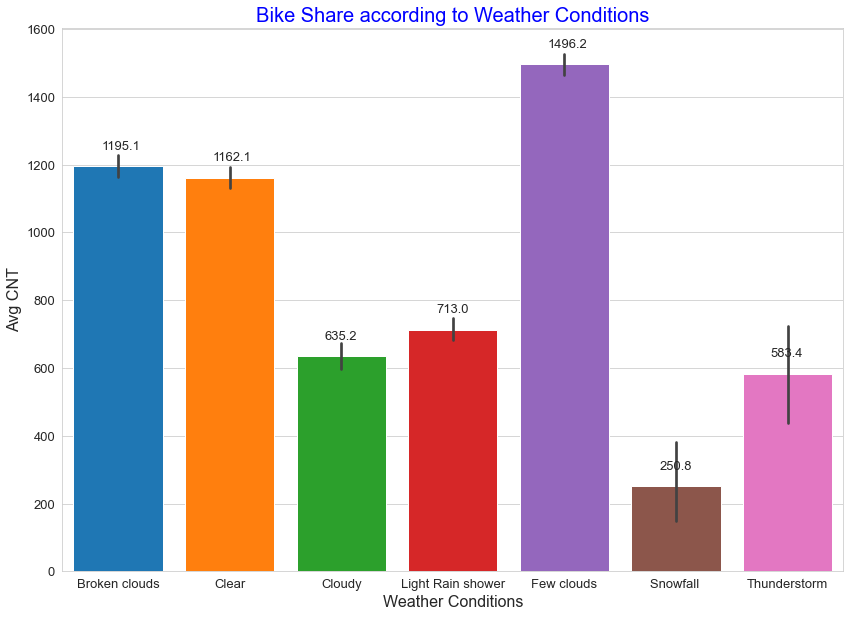

In [18]:
plt.figure(figsize=(14,10))
ax=sns.barplot(data = df, x = "weather_name", y="cnt", dodge=False, saturation=1);
plt.title("Bike Share according to Weather Conditions", {'fontsize': 20,'color': "blue"})
sns.set_style("whitegrid")

for p in (ax.patches):
    ax.annotate((p.get_height()).round(1), (p.get_x()+0.25, p.get_height()+50), size=13, ha="left" ) 
plt.tick_params('x', labelsize=13)  
plt.tick_params('y', labelsize=13)  
plt.xlabel("Weather Conditions", fontsize = 16)
plt.ylabel("Avg CNT", fontsize = 16);

<div class="alert alert-info">
<span style=" color:dark green">Acoording to weather condition bar chart...
    
- In average, bike sharing appears to be higher in good weathers: Few clouds, Clear and Broken clouds respectively. It can also be considered that the number of days with clouds is higher than clear ones in London.  
</span>

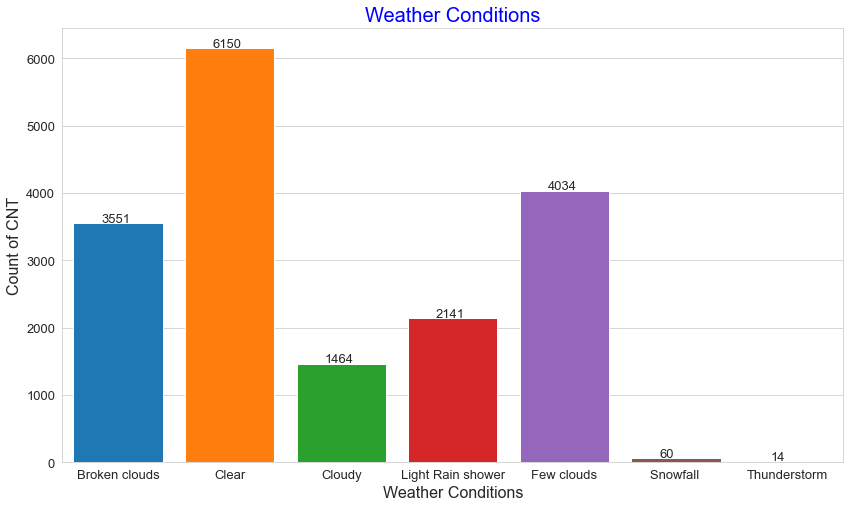

In [19]:
plt.figure(figsize=(14,8))
ax=sns.countplot(data = df, x = "weather_name", saturation=1);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+20), size=13)

plt.title("Weather Conditions", {'fontsize': 20,'color': "blue"})
plt.tick_params('x', labelsize=13)   
plt.tick_params('y', labelsize=13) 
plt.xlabel("Weather Conditions", fontsize = 16);
plt.ylabel("Count of CNT", fontsize = 16);

<div class="alert alert-info">
<span style=" color:dark green">
    
- There is more bike sharing on "Clear" days comparing to "Few clouds" and "Broken clouds". Let's see the number of bike sharing in holidays and at the weekends.
</span>

In [20]:
(df[(df["weather_name"] == "Few clouds")].mean().cnt).round(2)

1496.18

In [21]:
(df[(df["weather_name"] == "Clear")].mean().cnt).round(2)

1162.09

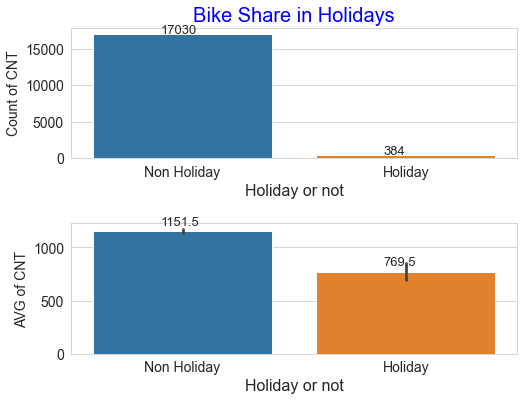

In [22]:
# Holidays or not

df["holidays"]=df["is_holiday"].apply(holiday)
fig, ax = plt.subplots(2,1, figsize=(8,6)) 
plt.subplots_adjust(hspace = 0.5)

sns.countplot(data = df, x = "holidays", ax=ax[0])
ax[0].set_title("Bike Share in Holidays", {'fontsize': 20,'color': "blue"})
ax[0].tick_params('x', labelsize=14)    
ax[0].tick_params('y', labelsize=14) 
ax[0].set_xlabel("Holiday or not", fontsize = 16)
ax[0].set_ylabel("Count of CNT", fontsize = 14)
for p in ax[0].patches:
    ax[0].annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+60), size=13)


sns.barplot(data = df, x = "holidays",y="cnt", ax = ax[1])
ax[1].tick_params('x', labelsize=14)    
ax[1].tick_params('y', labelsize=14) 
ax[1].set_xlabel("Holiday or not", fontsize = 16)
ax[1].set_ylabel("AVG of CNT", fontsize = 14);
for p in ax[1].patches:
    ax[1].annotate((p.get_height()).round(1), (p.get_x()+0.3, p.get_height()+60), size=13)

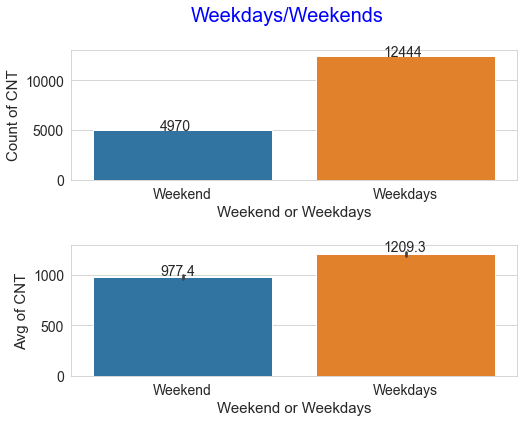

In [23]:
# Weekends or Weekdays?

df["weekends"]=df["is_weekend"].apply(weekend)

fig, ax = plt.subplots(2,1, figsize=(8,6)) 
plt.suptitle("Weekdays/Weekends", size=20, color= "blue")
plt.subplots_adjust(hspace = 0.5)

sns.countplot(data = df, x = "weekends", ax=ax[0])
#ax[0].set_title("Weeks", {'fontsize': 30,'color': "black"});

ax[0].tick_params('x', labelsize=14)    
ax[0].tick_params('y', labelsize=14) 
ax[0].set_xlabel("Weekend or Weekdays", fontsize = 15)
ax[0].set_ylabel("Count of CNT", fontsize = 15)
for p in ax[0].patches:
    ax[0].annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.10), size=14)


sns.barplot(data = df, x = "weekends", y="cnt", ax=ax[1])
ax[1].tick_params('x', labelsize=14)    
ax[1].tick_params('y', labelsize=14) 
ax[1].set_xlabel("Weekend or Weekdays", fontsize = 15)
ax[1].set_ylabel("Avg of CNT", fontsize = 15);
for p in ax[1].patches:
    ax[1].annotate((p.get_height()).round(1), (p.get_x()+0.3, p.get_height()+20), size=14)


<div class="alert alert-info">
<span style=" color:dark green">

-  Even if the number of weekends is less than weekdays, in average, bike sharing in Weekdays is more common than in weekends. Likewise, in a year, there are more non-holidays than holidays, yet the average bike sharing is higher in non-holidays.  
</span>


<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Feature Engineering</a>

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [24]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
is_holiday      float64
is_weekend      float64
season_name      object
weather_name     object
holidays         object
weekends         object
dtype: object

In [25]:
# As seen above, type of "timestamp" column is object. Let's change its type. 
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [26]:
df["timestamp"].dtype

dtype('<M8[ns]')

In [27]:
# set it as index column
df.set_index('timestamp', inplace= True)

In [28]:
# change it as datetime64
df.index=df.index.astype('datetime64[ns]') 

In [29]:
# our new index is timestamp 
df.head(5)

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_name,weather_name,holidays,weekends
timestamp,,,,,,,,,,,
2015-01-04 00:00:00,182,3.00,2.00,93.00,6.00,0.00,1.00,Winter,Broken clouds,Non Holiday,Weekend
2015-01-04 01:00:00,138,3.00,2.50,93.00,5.00,0.00,1.00,Winter,Clear,Non Holiday,Weekend
2015-01-04 02:00:00,134,2.50,2.50,96.50,0.00,0.00,1.00,Winter,Clear,Non Holiday,Weekend
2015-01-04 03:00:00,72,2.00,2.00,100.00,0.00,0.00,1.00,Winter,Clear,Non Holiday,Weekend
2015-01-04 04:00:00,47,2.00,0.00,93.00,6.50,0.00,1.00,Winter,Clear,Non Holiday,Weekend


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

In [30]:
# Create new columns from timestamp

df["year"] =  df.index.year
df["month"] =  df.index.month
df["day_of_month"] =  df.index.day
df["day_of_week"] =  df.index.dayofweek
df["hour"] = df.index.hour
df["year-month"] = df.index.strftime("%Y-%m")

In [31]:
df.sample(5) # see new columns

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_name,weather_name,holidays,weekends,year,month,day_of_month,day_of_week,hour,year-month
timestamp,,,,,,,,,,,,,,,,,
2015-02-04 23:00:00,294,3.00,-0.50,81.00,15.00,0.00,0.00,Winter,Broken clouds,Non Holiday,Weekdays,2015,2,4,2,23,2015-02
2016-09-05 20:00:00,1200,22.00,22.00,83.00,10.00,0.00,0.00,Autumn,Broken clouds,Non Holiday,Weekdays,2016,9,5,0,20,2016-09
2016-12-21 21:00:00,638,11.00,11.00,82.00,10.00,0.00,0.00,Winter,Broken clouds,Non Holiday,Weekdays,2016,12,21,2,21,2016-12
2016-03-12 04:00:00,79,5.00,5.00,93.00,4.00,0.00,1.00,Spring,Broken clouds,Non Holiday,Weekend,2016,3,12,5,4,2016-03
2016-01-29 08:00:00,3452,12.00,12.00,72.00,38.00,0.00,0.00,Winter,Broken clouds,Non Holiday,Weekdays,2016,1,29,4,8,2016-01


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation
</span>

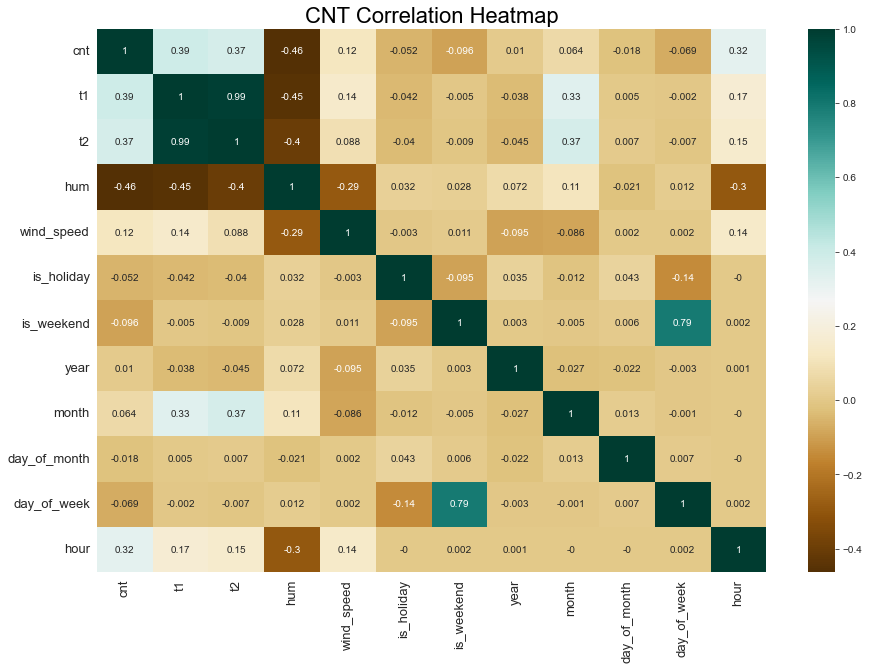

In [32]:
# Heatmap to see coreelation between target variable (cnt) and independent variables
plt.figure(figsize=(15,10))
sns.heatmap(data = round(df.corr(),3), annot= True, cmap="BrBG" )
plt.title("CNT Correlation Heatmap", {'fontsize': 22,'color': "black"})
plt.tick_params('x', labelsize=13)
plt.tick_params('y', labelsize=13); 


<div class="alert alert-info">
<span style=" color:dark green">We deduce from the heatmap that...
    
-  Target variable (cnt) has low positive correlation with "t1", "t2" and "hour" and low negatif correlation with "humidity" and "wind_speeed". More importantly, high coreelation (0.99) between t1 and t2 proves that there is a multicollinearity problem between these two independent variables. We can drop one of them.   
</span>


In [33]:
# Another way to see correlation
df_corr_cnt=df.corr()[["cnt"]].sort_values(by="cnt", ascending =False)
(df_corr_cnt).T

,cnt,t1,t2,hour,wind_speed,month,year,day_of_month,is_holiday,day_of_week,is_weekend,hum
cnt,1.00,0.39,0.37,0.32,0.12,0.06,0.01,-0.02,-0.05,-0.07,-0.10,-0.46


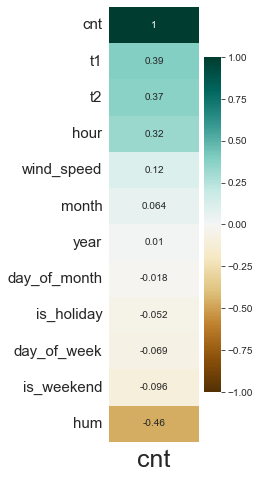

In [34]:
# Another way to see correlation 
plt.figure(figsize=(2,8))
sns.heatmap(df_corr_cnt, annot =True, cmap = "BrBG", vmin =-1, vmax=1); 
plt.tick_params('x', labelsize=25)   
plt.tick_params('y', labelsize=15); 

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Plot bike shares over time by using lineplot.
</span>

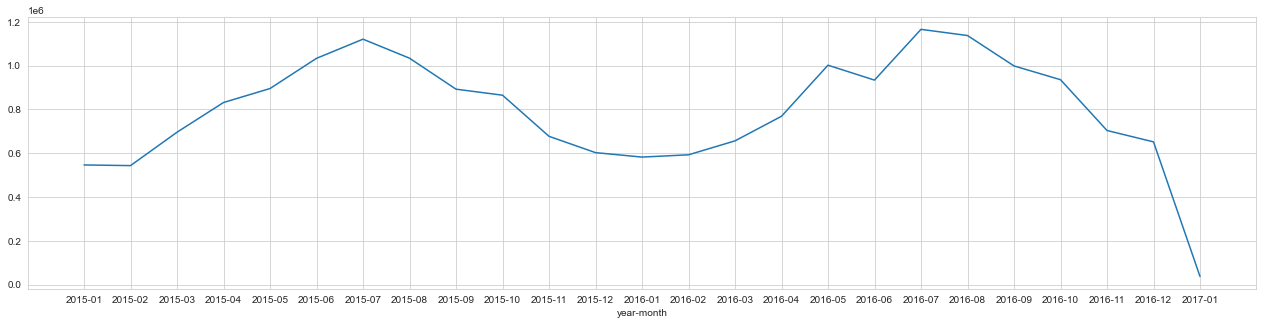

In [35]:
# We can simply see the bike sharing according to months during the years between 2015-2017. 
date_cnt = df.groupby("year-month")["cnt"].sum()
plt.figure(figsize=(22,5))
sns.lineplot(date_cnt.index, date_cnt.values);

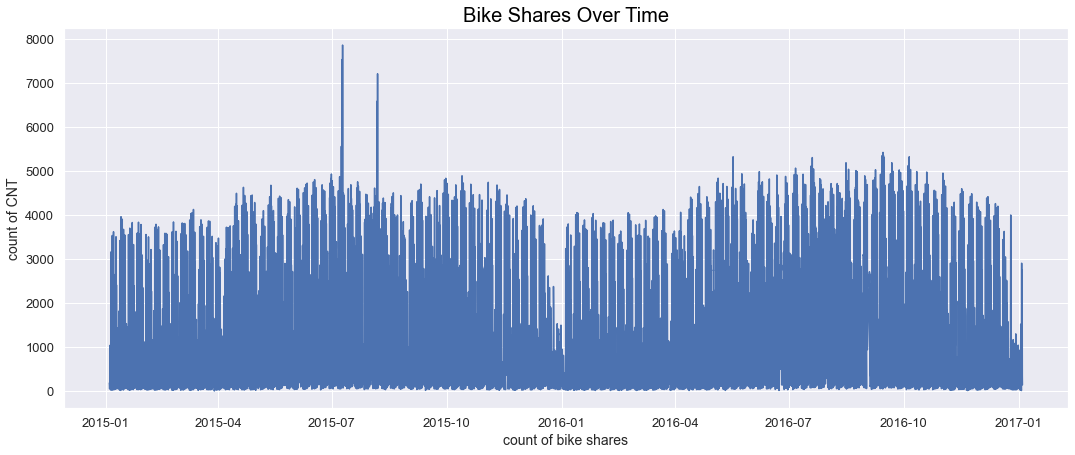

In [36]:
# Let's see more closely

plt.figure(figsize=(18,7)) 
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x=df.index, y="cnt")
plt.xlabel('count of bike shares', fontsize=14)
plt.ylabel('count of CNT', fontsize=14);
plt.title("Bike Shares Over Time", {'fontsize': 20,'color': "Black"})
plt.tick_params('x', labelsize=13)   
plt.tick_params('y', labelsize=13);

<div class="alert alert-info">
<span style=" color:dark green">
    
-  As seen from the lineplot that the number of bike shares is lower in Winters. Also, there are a few outliers in Summer 2015 in terms of sharing bikes.
    
</span>

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

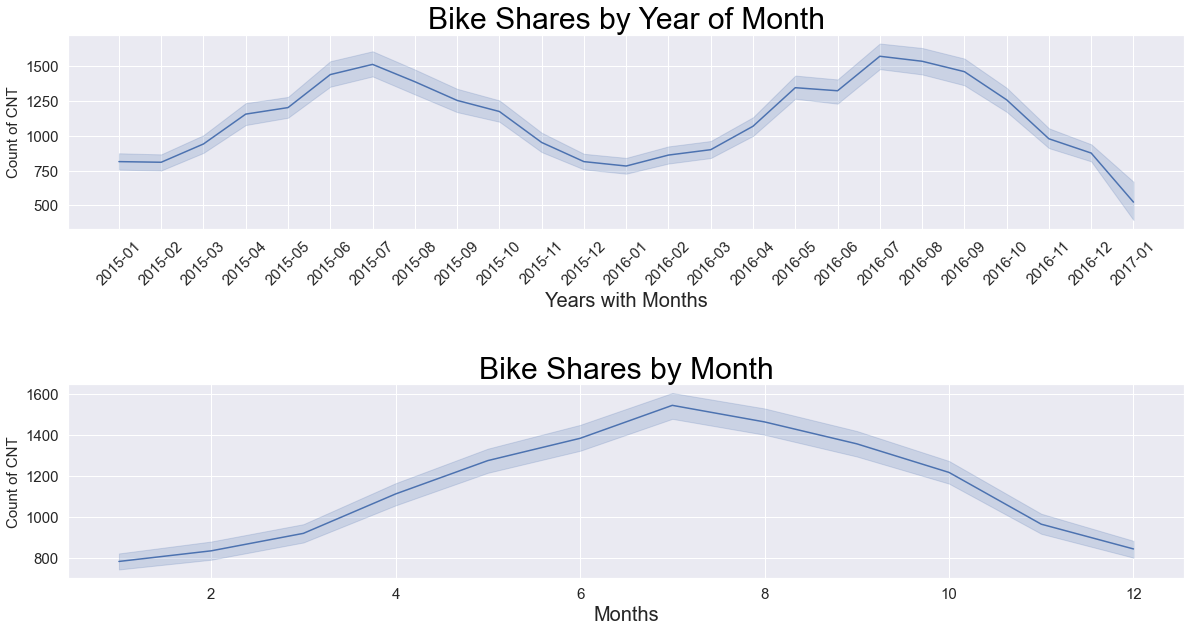

In [37]:
# With lineplot

fig, ax = plt.subplots(2,1, figsize=(20,10)) 
plt.subplots_adjust(hspace = 0.8)
sns.lineplot(x="year-month", y="cnt", data=df, ax=ax[0])
ax[0].set_title("Bike Shares by Year of Month", {'fontsize':30, 'color': "black"});
ax[0].tick_params('x', labelsize=15, rotation=45)    
ax[0].tick_params('y', labelsize=15) 
ax[0].set_xlabel("Years with Months", fontsize = 20)
ax[0].set_ylabel("Count of CNT", fontsize = 15)


sns.lineplot(x="month", y="cnt", data=df, ax=ax[1]);
ax[1].set_title("Bike Shares by Month", {'fontsize':30,'color': "black"})
ax[1].tick_params('x', labelsize=15)    
ax[1].tick_params('y', labelsize=15) 
ax[1].set_xlabel("Months", fontsize = 20)
ax[1].set_ylabel("Count of CNT", fontsize = 15);


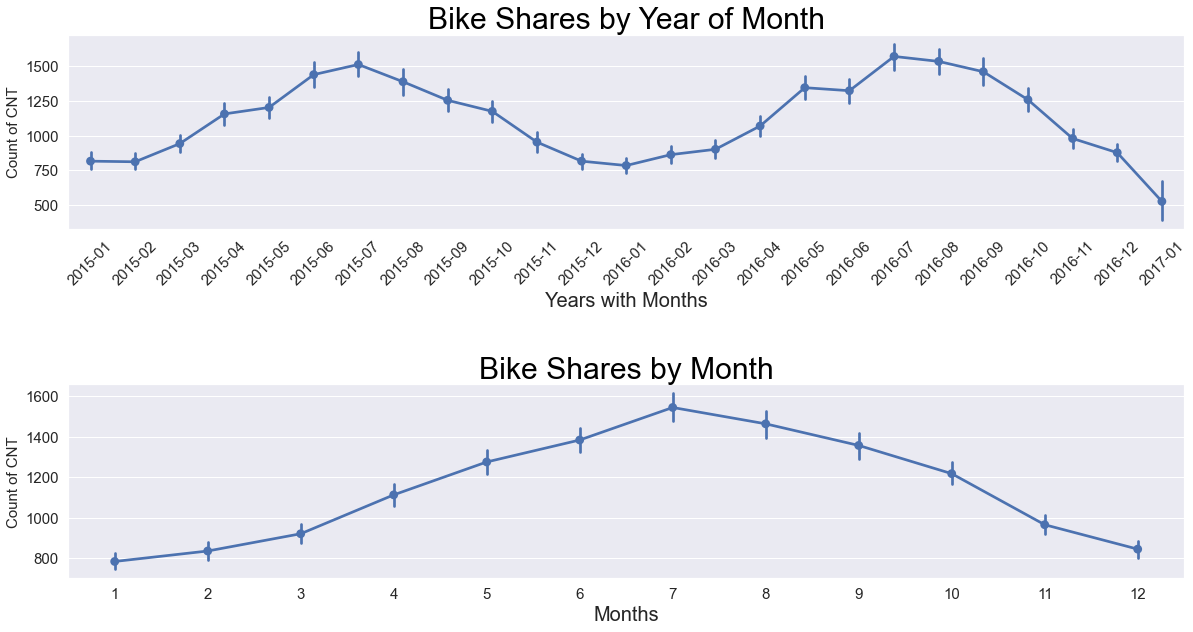

In [38]:
# With pointplot

fig, ax = plt.subplots(2,1, figsize=(20,10)) 
plt.subplots_adjust(hspace = 0.8)
sns.pointplot(x="year-month", y="cnt", data=df, ax=ax[0])
ax[0].set_title("Bike Shares by Year of Month", {'fontsize':30, 'color': "black"});
ax[0].tick_params('x', labelsize=15, rotation=45)    
ax[0].tick_params('y', labelsize=15) 
ax[0].set_xlabel("Years with Months", fontsize = 20)
ax[0].set_ylabel("Count of CNT", fontsize = 15)


sns.pointplot(x="month", y="cnt", data=df, ax=ax[1]);
ax[1].set_title("Bike Shares by Month", {'fontsize':30,'color': "black"})
ax[1].tick_params('x', labelsize=15)    
ax[1].tick_params('y', labelsize=15) 
ax[1].set_xlabel("Months", fontsize = 20)
ax[1].set_ylabel("Count of CNT", fontsize = 15);

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by hours on (holidays, weekend, season).
</span>

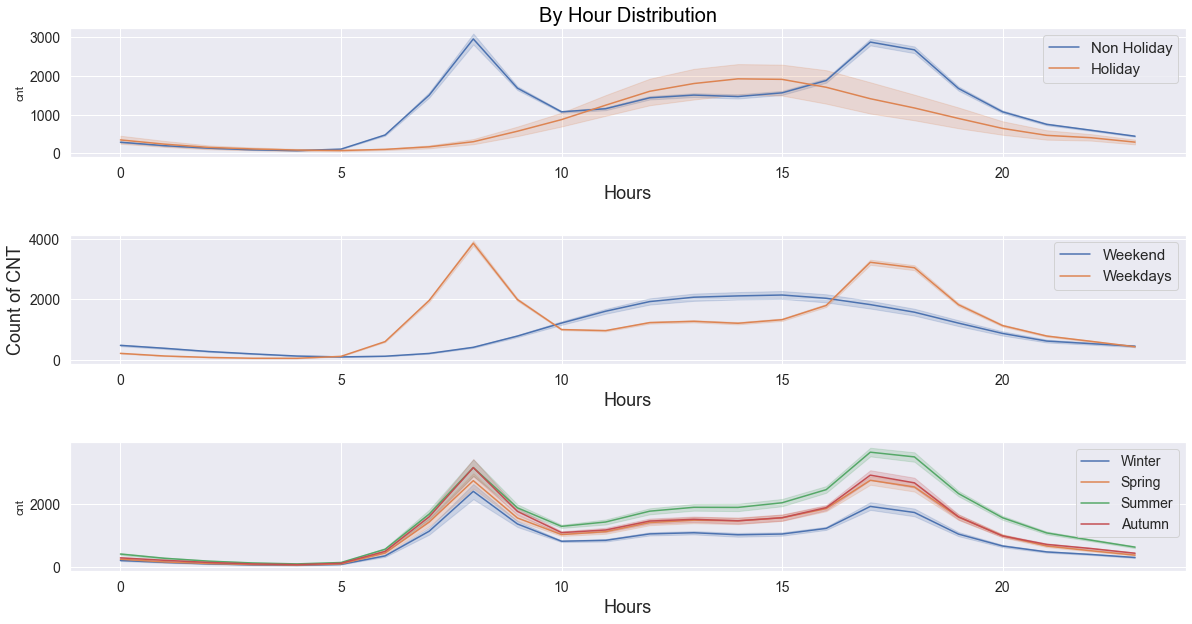

In [39]:
fig, ax = plt.subplots(3,1, figsize=(20,10)) 
plt.subplots_adjust(hspace = 0.6)

sns.lineplot(x= "hour", y="cnt", data=df, hue="holidays", ax=ax[0])
ax[0].set_title("By Hour Distribution", {'fontsize': 20,'color': "black"})
ax[0].legend(fontsize=15)
ax[0].tick_params('x', labelsize=14)    
ax[0].tick_params('y', labelsize=14) 
ax[0].set_xlabel("Hours", fontsize = 18);

sns.lineplot(x= "hour", y="cnt", data=df, hue="weekends", ax=ax[1])
ax[1].legend(fontsize=15)
ax[1].tick_params('x', labelsize=14)    
ax[1].tick_params('y', labelsize=14) 
ax[1].set_xlabel("Hours", fontsize = 18)
ax[1].set_ylabel("Count of CNT", fontsize = 18);

sns.lineplot(x= "hour", y="cnt", data=df, hue="season_name", ax=ax[2])
ax[2].legend(fontsize=14)
ax[2].tick_params('x', labelsize=14)    
ax[2].tick_params('y', labelsize=14) 
ax[2].set_xlabel("Hours", fontsize = 18);

<div class="alert alert-info">
<span style=" color:dark green">
    
- As seen from all three graphs, the number of bike sharing is higher between 07-09 and 17-19 o'clock. Thus, people in London probably use bikes to go to job and to go back from job.
    
- In the fist graph, during the holidays the number of bike sharing is higher between 12-16 o'clock. Likewise, in the second graph, we see a similar trend at the Weekends. In terms of seasons, Summer is the most popular season to share bikes whereas Winter is the least.
</span>

<div class="alert alert-warning alert-info">
<span style=" color:red"> 11. Plot bike shares by year

</span>

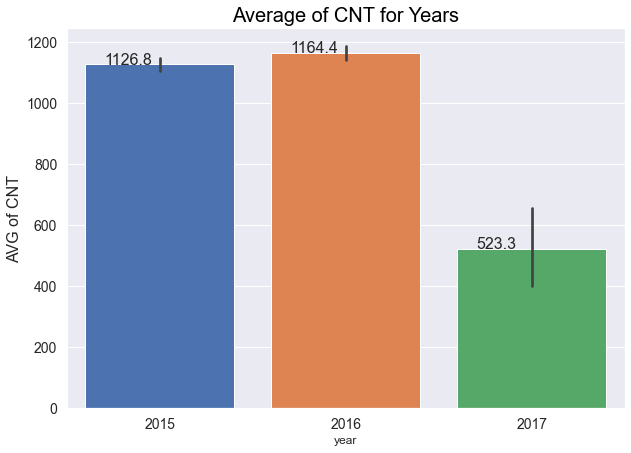

In [40]:
df["year"] = df.index.strftime("%Y")


plt.figure(figsize=(10,7))  
ax=sns.barplot(x="year", y="cnt", data=df, saturation=1)
plt.title("Average of CNT for Years", {'fontsize': 20,'color': "black"})
plt.ylabel('AVG of CNT', fontsize=16)
plt.tick_params('x', labelsize=14)   
plt.tick_params('y', labelsize=14);
for p in (ax.patches):
    ax.annotate((p.get_height()).round(1), (p.get_x()+0.10, p.get_height()+0.50), size=16)


<div class="alert alert-info">
<span style=" color:dark green">
    
- Since we do not have enough data in 2017 (only one month), average number of bike sharing is the lowest in 2017. On the other hand, there are more bike sharing in average in 2016 than 2015. Since we have data for January in all three years, we can compare them. 
</span>

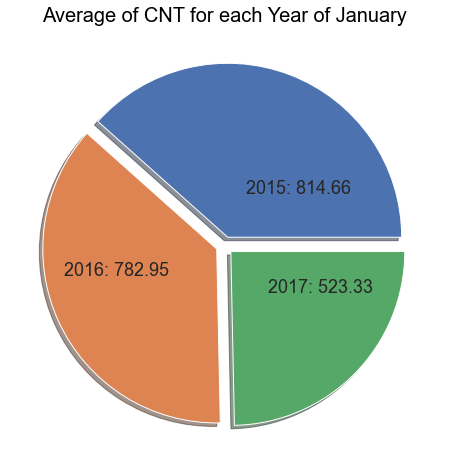

In [41]:
# Comapare bike sharing in January in 2015, 2016 and 2017

january=df[df["month"]==1]
data=january.groupby("year").mean().cnt

pie, ax = plt.subplots(figsize=(8,8))

plt.pie(x=data,
       shadow=True, labels = ["2015: 814.66", "2016: 782.95",
                              "2017: 523.33"],
       labeldistance=0.3, 
        explode=[0.05]*3,
        pctdistance=0.1, textprops={'fontsize': 18}
      );

plt.title("Average of CNT for each Year of January", {'fontsize': 20,'color': "black"});

<div class="alert alert-warning alert-info">
<span style=" color:red">12. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

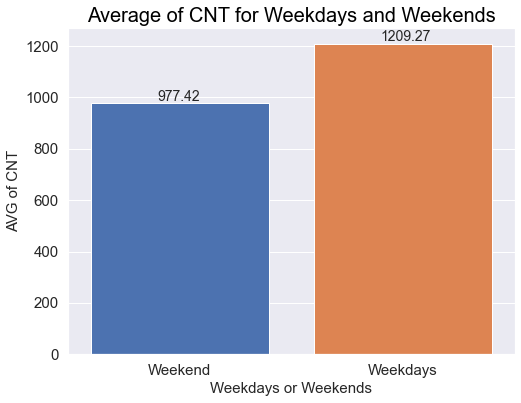

In [42]:
plt.figure(figsize=(8,6)) 
ax=sns.barplot(x="weekends", y="cnt", data=df, ci=None, saturation=1);
for p in ax.patches:
    ax.annotate((p.get_height()).round(2), (p.get_x()+0.30, p.get_height()+10),  size=14);
plt.title("Average of CNT for Weekdays and Weekends", {'fontsize': 20,'color': "black"})
plt.xlabel('Weekdays or Weekends', fontsize=15)
plt.ylabel('AVG of CNT', fontsize=15)
plt.tick_params('x', labelsize=15)   
plt.tick_params('y', labelsize=15);

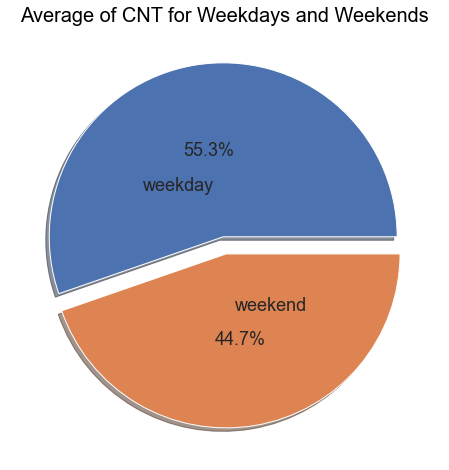

In [43]:
data1=df.groupby("is_weekend").mean().cnt

plt.figure(figsize=(8,8))

plt.pie(x=data1,
      labels=["weekday","weekend"],
        shadow=True,
       labeldistance=0.3,
       explode=[0.05]*2,
        autopct="%.1f%%",
        pctdistance=0.5,
        textprops={'fontsize': 18}
      );
plt.title("Average of CNT for Weekdays and Weekends", {'fontsize': 20,'color': "black"});



<div class="alert alert-warning alert-info">
<span style=" color:red">13. Plot the distribution of weather code by seasons
</span>

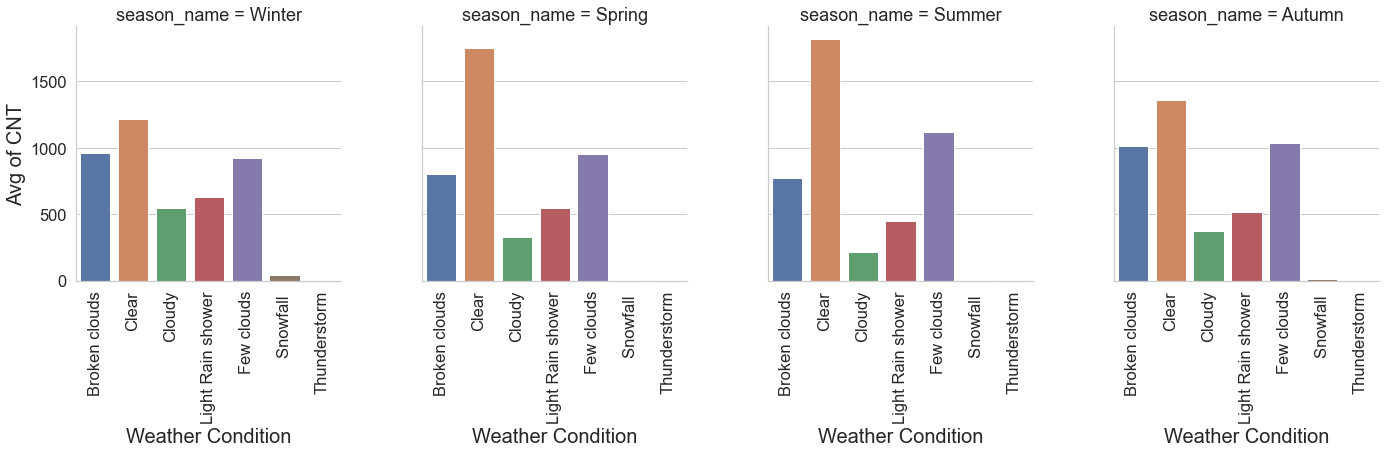

In [44]:

sns.set_theme(style = "whitegrid", font_scale= 1.5)
ax = sns.catplot(x="weather_name", col="season_name",
            kind="count", data=df, dodge=False)
ax.set_xticklabels(rotation = 90)
ax.set_ylabels('Avg of CNT', fontsize= 20);
ax.set_xlabels('Weather Condition', fontsize= 20);

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusion 

</span>

Based on Data Visualization Capstone Project, I have studied bike shares in London beginnnig from 2015 until the end of January 2017. As the graphs revealed, the most aproppriate months for bike shares are between 5th (May) and 10th (October) months of the year. Also, bike sharing times during the day show us that people demand bikes in the early morning and just after the work. Probably they prefer bikes as an alternative to other transportation means in rush hours. 

Bike Share company can categorize its customers into several groups. Among them, it seems that working people is the best customers and the company can give a priority to this group. Another group may be students. Additionaly, since there is high demand in the morning and after the work, bike shares company may consider taking measures to meet this high demand.  In order to increase demand at weekends and holidays, the company can arrange some activities and campaigns. 